<a href="https://colab.research.google.com/github/Atreya235/OIBSIP/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 First 5 rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

📊 Dataset Info:
<class 'pandas.core.frame.DataFra

/tmp/ipython-input-14-3872205614.py:26: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/tmp/ipython-input-14-3872205614.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


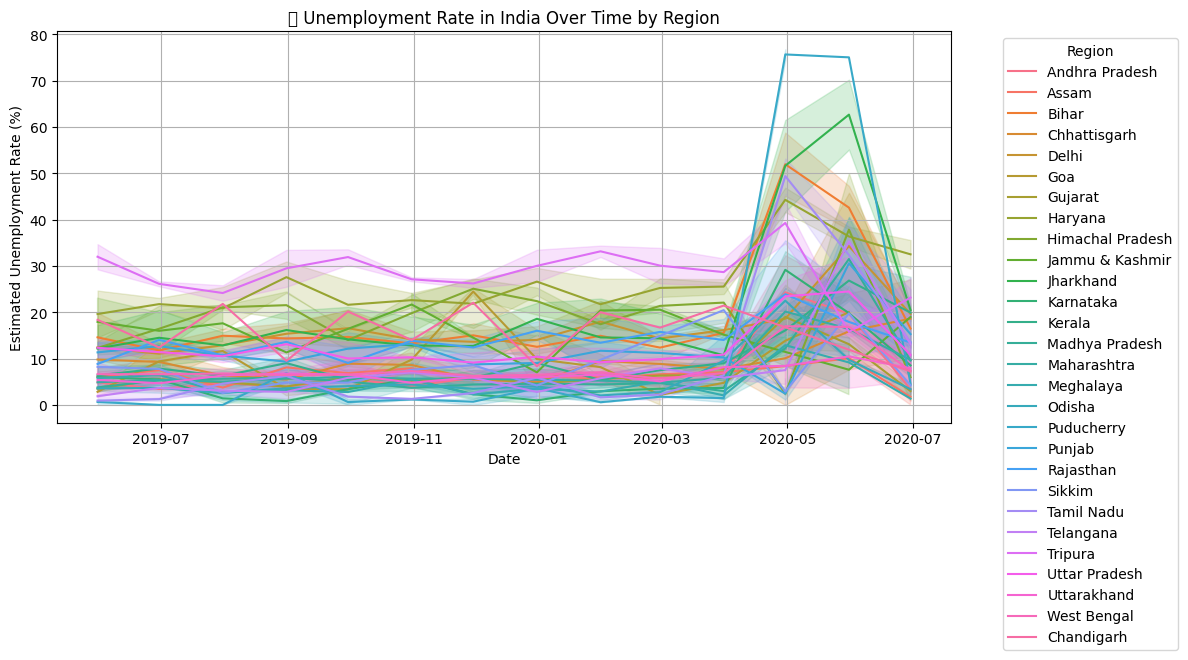

✅ COVID-period entries: 204
         date          region  estimated_unemployment_rate_
10 2020-03-31  Andhra Pradesh                          4.06
11 2020-04-30  Andhra Pradesh                         16.29
12 2020-05-31  Andhra Pradesh                         14.46
13 2020-06-30  Andhra Pradesh                          0.85
23 2020-03-31           Assam                          3.77


/tmp/ipython-input-14-3872205614.py:65: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


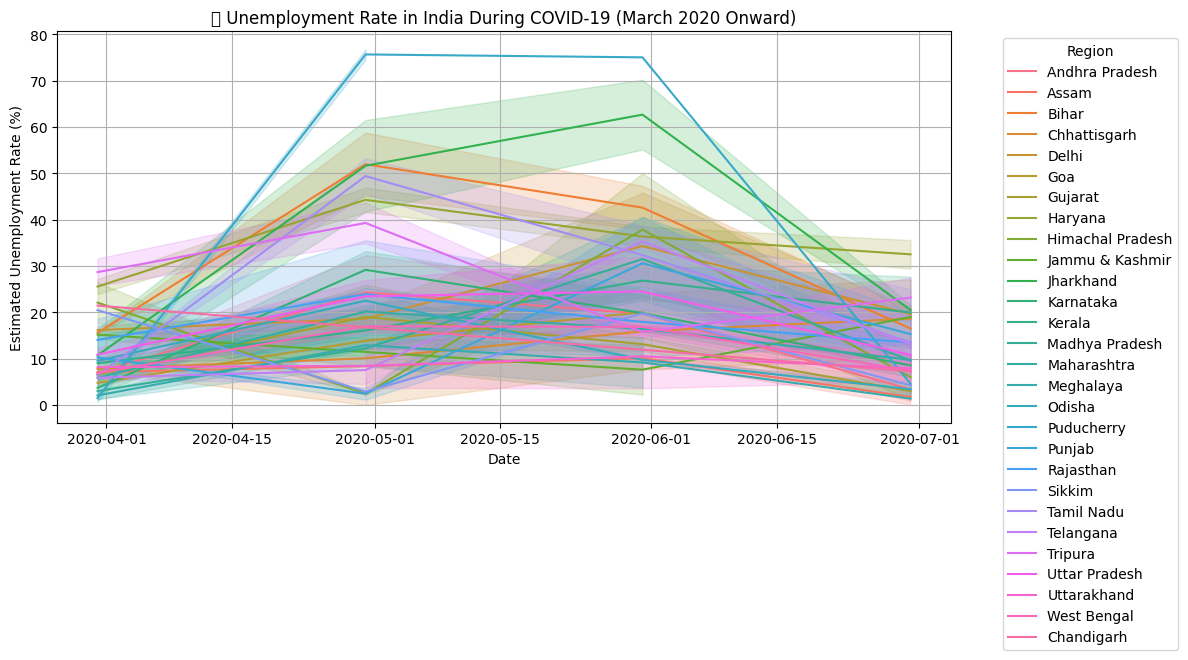

/tmp/ipython-input-14-3872205614.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


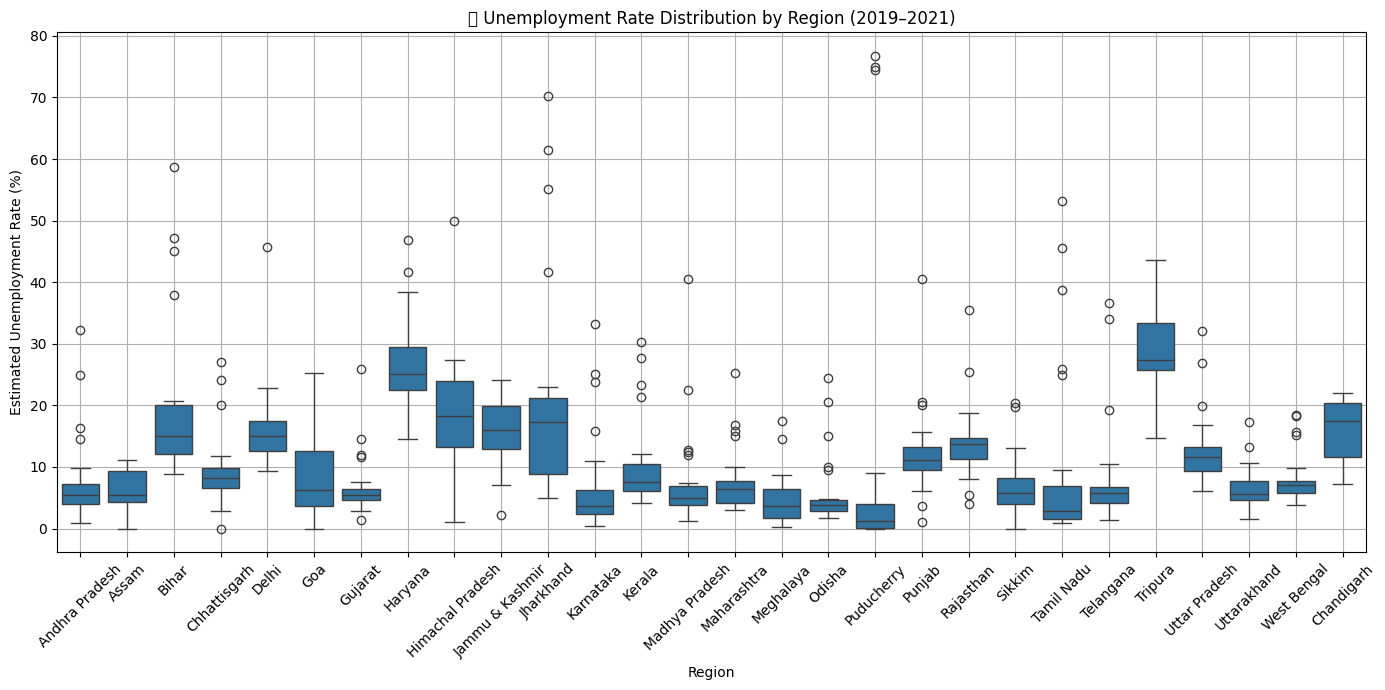

📍 Unique area values:
['Rural' nan 'Urban']


/tmp/ipython-input-14-3872205614.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='area', y='estimated_unemployment_rate_', palette='Set2')
/tmp/ipython-input-14-3872205614.py:99: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-3872205614.py:99: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


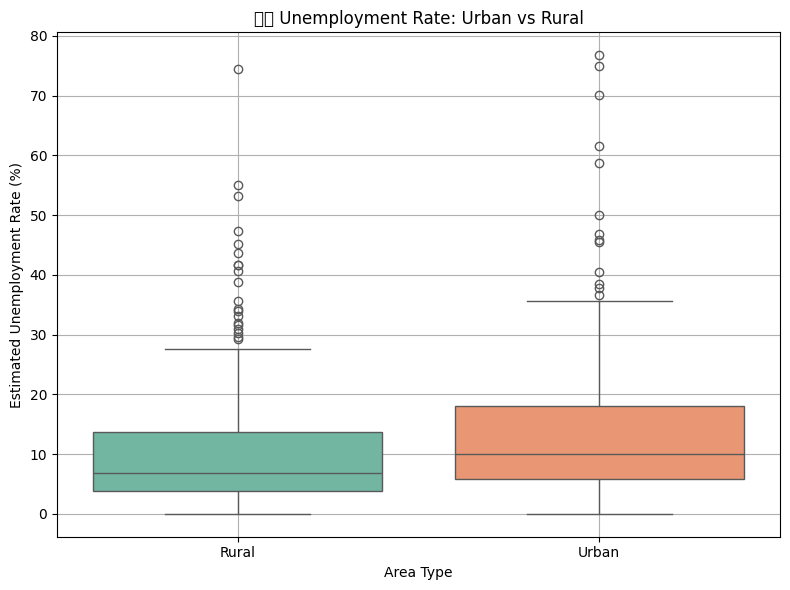

In [14]:

# STEP 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2: Load the Dataset
file_path = '/content/drive/MyDrive/csv/Unemployment in India.csv'  # (uploaded earlier)
df = pd.read_csv(file_path)

# STEP 3: Preview the Dataset
print("🔍 First 5 rows of the dataset:")
print(df.head())

# STEP 4: Clean Column Names (remove spaces, brackets, and % symbols)
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.replace('%', '', regex=False)
)

# STEP 5: Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# STEP 6: Info & Null Check
print("\n📊 Dataset Info:")
print(df.info())
print("\n🧼 Missing Values:")
print(df.isnull().sum())

# 📊 PART 3: Line Plot - Unemployment Rate Over Time by Region



plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_', hue='region')

plt.title("📈 Unemployment Rate in India Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 📅 Filter data for the COVID-19 period (March 2020 and after)
covid_df = df[df['date'] >= '2020-03-01']

# 🧼 Check if data exists
print(f"✅ COVID-period entries: {len(covid_df)}")
print(covid_df[['date', 'region', 'estimated_unemployment_rate_']].head())
# Plot COVID-only unemployment trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='date', y='estimated_unemployment_rate_', hue='region')

plt.title("📉 Unemployment Rate in India During COVID-19 (March 2020 Onward)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 📊 PART 5: Region-wise Unemployment Rate Distribution (Boxplot)



plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='region', y='estimated_unemployment_rate_')

plt.title("📊 Unemployment Rate Distribution by Region (2019–2021)")
plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



# 🔍 Check area categories
print("📍 Unique area values:")
print(df['area'].unique())

# 📊 Compare Urban vs Rural unemployment rate
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='area', y='estimated_unemployment_rate_', palette='Set2')

plt.title("🏙️🌾 Unemployment Rate: Urban vs Rural")
plt.xlabel("Area Type")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



